Universidade Federal de Santa Catarina<br>
Departamento de Engenharia Elétrica e Eletrônica<br>
EEL7514/EEL7513/EEL410250 - Aprendizado de Máquina
$\newcommand{\bX}{\mathbf{X}}$
$\newcommand{\bw}{\mathbf{w}}$
$\newcommand{\by}{\mathbf{y}}$
$\newcommand{\bx}{\mathbf{x}}$
$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\bzero}{\mathbf{0}}$


# Exercício 3: Regressão Linear & Otimização Numérica

Neste exercício você irá explorar métodos de otimização numérica para treinar um modelo de regressão linear. Em particular, você irá implementar o método do gradiente e analisar sua convergência. Além disso, você irá investigar o efeito da normalização de atributos no comportamento do método. Finalmente, você irá investigar a aplicação de regressão linear em um conjunto de dados real.

# Conjunto de dados #1

Inicialmente, utilizaremos o mesmo conjunto de dados do exercício anterior, exceto por uma escala diferente em $x$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def gen_data(n_samples, x_scale=[0,1], noise=0.5):
    '''Generate univariate regression dataset'''
    x = np.sort(np.random.rand(n_samples))
    y = 6*(-1/6 + x + (x > 1/3)*(2/3-2*x) + (x > 2/3)*(2*x-4/3)) + noise*np.random.randn(n_samples)
    x = x_scale[0] + (x_scale[1]-x_scale[0])*x
    X = x.reshape(-1,1)
    return X, y

def plot_data(X, y):
    '''Plot univariate regression dataset'''
    assert len(X.shape) == 2 and len(y.shape) == 1
    plt.plot(X[:,0],y,'b.'); plt.xlabel('x'); plt.ylabel('y');
    return

def plot_prediction(model, X, y, n_points=100):
    '''Plot dataset and predictions for a univariate regression model'''
    plot_data(X,y)
    if n_points is not None:
        xx = np.linspace(X.min(),X.max(),n_points)
        yy = model.predict(xx.reshape(-1,1))
        plt.plot(xx,yy,'r-')
    y_pred = model.predict(X)
    plt.plot(X[:,0],y_pred,'r.')
    plt.legend(['True', 'Predicted'])
    return

O conjunto de dados pode ser gerado e visualizado pelos comandos abaixo (observe a nova escala).

(30, 1) (30,)
(1000, 1) (1000,)
(1000, 1) (1000,)


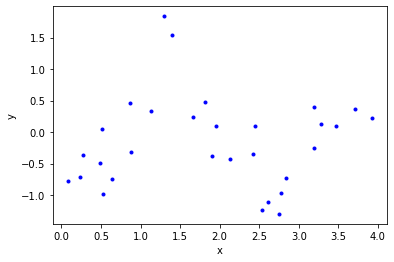

In [2]:
np.random.seed(2019*2)
X, y = gen_data(n_samples=30, x_scale=[0,4])
X_val, y_val = gen_data(n_samples=1000, x_scale=[0,4])
X_test, y_test = gen_data(n_samples=1000, x_scale=[0,4])

print(X.shape, y.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

# Plot only the training data!
plot_data(X,y)

## 1. Método do gradiente

Resgate a classe do modelo que você implementou no exercício anterior. Iremos reorganizá-la para permitir um método de treinamento alternativo.

1. Utilize a classe abaixo, substituindo na função `_fit_ne` a sua função `fit` implementada anteriormente, com as modificações necessárias. Note que a função `add_powers` foi eliminada (bem como o argumento `d` da inicialização do modelo), sendo substituída pela função `_add_ones` (que simplesmente adiciona uma coluna de 1's). Ou seja, nosso modelo deve implementar puramente uma regressão linear (com regularização L2), sem atributos adicionais. Caso desejemos atributos polinomiais, poderemos usar a classe `PolynomialFeatures` do sklearn. A única vantagem do nosso modelo de regressão próprio em relação ao `Ridge` é permitir utilizar um método de treinamento diferente.
- Mova a função `mse` para fora da classe, caso contrário não poderemos acessá-la dentro de um `Pipeline`.

In [3]:
class Model():
    # Linear regression with L2 regularization
    def __init__(self, lamb=0, solver='ne', lr=1, maxiter=1000, tol=1e-5):
        # Initialization
        self.lamb = lamb
        self.solver = solver
        self.lr = lr
        self.maxiter = maxiter
        self.tol = tol
        return
    
    def _add_ones(self, X):
        # Add column of ones
        X_new = np.c_[np.ones(X.shape[0]), X]
        return X_new
    
    def _fit_ne(self, X, y):
        X = self._add_ones(X)
        L = ???
        self.hessian = ???
        assert np.linalg.matrix_rank(X.T @ X + self.lamb*L) == X.shape[1], 'Singular matrix'
        self.w = ???
        return

    def _fit_gd(self, X, y):
        # Fit by gradient descent
        ???
        return

    def fit(self, X, y):
        if self.solver == 'gd':
            self._fit_gd(X, y)
        elif self.solver == 'ne':
            self._fit_ne(X, y)
        else:
            raise RuntimeError('Unknown solver')
        return self

    def predict(self, X):
        X = self._add_ones(X)
        y_pred = ???
        return y_pred

def mse(model, X, y):
    return ???

3. Modifique a função `_fit_ne` para calcular também a matriz hessiana da função custo (regularizada), guardando-a na variável `self.hessian`. Em seguida, após o treinamento usando a solução analítica, estime o grau de condicionamento da hessiana utilizana a função `np.linalg.cond()`.
- Complete a função `_fit_gd` implementando o método do gradiente. Utilize os parâmetros `self.lr` (taxa de aprendizado), `self.maxiter` (número máximo de iterações) e `self.tol` (critério de parada para a norma do gradiente), e assuma como ponto inicial $\bw = (0,\ldots,0)$. Além de calcular `self.w`, sua função deve criar também uma lista, `self.J_history`, contendo os valores da função custo (regularizada) a cada iteração, a qual será usada para monitorar o treinamento e analisar a taxa de aprendizado.
- Treine o modelo sem regularização usando `solver='gd'`, trace o gráfico de `J_history` e escolha uma boa taxa de aprendizado. Quantas iterações foram necessárias para convergência?
- Calcule o MSE de treinamento e de validação e compare-os com os obtidos pela solução analítica. Compare também os vetores $\bw$ das duas soluções. (Obs: a saída da célula 5 está mostrada apenas para ilustração. Não é necessário reproduzir exatamente o mesmo texto/gráfico.)
- (OPCIONAL) O que acontece com o erro de validação à medida que a taxa de aprendizado é reduzida? Como podemos interpretar esse fenômeno?

In [4]:
# Normal equation
model = Model()
model.fit(X, y)
print('w =', ???)
print('Train MSE: %f' % mse(model, X, y));
print('  Val MSE: %f' % mse(model, X_val, y_val));
print('Condition number: %f' % ???)

w = [-0.20189161  0.02333163]
Train MSE: 0.517264
  Val MSE: 0.601059
Condition number: 24.959359


w = [-0.20187165  0.0233235 ]
Train MSE: 0.517264
  Val MSE: 0.601058
Iterations: 631
MAPE from optimal w: 0.022371%


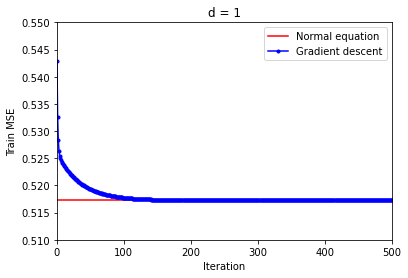

In [5]:
# Gradient descent


## 2. Adicionando atributos

1. Adicione atributos polinomiais de grau `d=2` usando o transformador `PolynomialFeatures`. Em seguida, repita o treinamento via solução analítica e estimação do grau de condicionamento da hessiana.
- Repita o treinamento usando método do gradiente (incluindo gráfico da função custo) e verifique a dificuldade de convergência. Por que isso ocorre? Foi necessário alterar a taxa de aprendizado? E o número máximo de iterações?
- Assim como anteriormente, compare o MSE e o $\bw$ obtidos com os da solução analítica.
- Repita os itens anteriores para `d=3`.

#### Dica

- Não há necessidade de incluir o termo constante nos atributos adicionados, uma vez que o modelo de regressão linear já implementa a adição de coluna de 1's. Assim, utilize `PolynomialFeatures(d, include_bias=False)`.
- Normalmente, é conveniente utilizar a função `make_pipeline` para combinar pré-processamento (transformação de atributos) e modelo de aprendizado (estimador) em um único modelo. Além de deixar o código mais compacto, essa metodologia ajuda a evitar erros de vazamento de informação entre teste e treinamento, pois garante que o transformador será treinado somente com os dados de treinamento. No entanto, como o nosso foco aqui é o treinamento, é mais conveniente primeiramente aplicar a transformação de atributos explicitamente no conjunto de dados, obtendo um conjunto transformado (aqui com sufixo `_new`), o qual é então entregue ao modelo de aprendizado. Embora não seja o caso aqui, essa abordagem também é mais eficiente quando o pré-processamento é particularmente complexo e serão realizados múltiplos treinamentos, assim o pré-processamento só precisa ser realizado uma vez.

In [6]:
# Feature transformation
d = 2
prep = PolynomialFeatures(d,include_bias=False)
X_new = prep.fit_transform(X)
X_val_new = prep.transform(X_val)

# Normal equation
model = Model()
model.fit(X_new, y)
???

w = [-0.35250239  0.26848578 -0.06441263]
Train MSE: 0.511996
  Val MSE: 0.611803
Condition number: 955.280910


In [7]:
# Gradient descent


## 3. Escalonamento de atributos

Implemente a normalização (escalonamento) de atributos conforme vista em sala, a qual consiste de:
 - Subtração da média do atributo, para que passe a ter média nula
 - Divisão pelo desvio padrão do atributo, para que passe a ter variância unitária
 
Esse tipo de normalização também é chamado em alguns contextos de padronização (*standardization*), no sentido de resultar na mesma média (0) e variância (1) de uma variável aleatória gaussiana padrão (*standard*), em contraste com outros tipos de normalização (por exemplo, reescalonamento para a escala [0,1]).

1. Para isso, complete a classe abaixo. Caso deseje confirmar se sua implementação está correta, compare com o transformador `StandardScaler` do módulo `sklearn.preprocessing`.
- Após implementar corretamente, verifique que seu escalonador funciona corretamente em um pipeline do `sklearn`; isto é, combine todas as etapas de pré-processamento (transformação de atributos e escalonamento) usando `make_pipeline`. Em seguida, você pode ignorar sua implementação e passar a usar o `StandardScaler`.
- Refaça os mesmos passos da seção anterior (2.1-2.4) e compare os resultados e o comportamento do algoritmo. Explique.
- Neste problema, em qual posição o escalonador funciona melhor, antes ou depois da adição de atributos? Cite as evidências que você observou.
- O uso do escalonador tem impacto do desempenho da solução analítica? Por quê?
- (OPCIONAL) Experimente outros escalonadores do `sklearn`, como `MinMaxScaler` e `MaxAbsScaler`, e compare o desempenho obtido.

#### Dicas

- Funções úteis:

```python
np.mean(axis=0), np.std(axis=0)
```

- Revise as propriedades de broadcasting do NumPy, em particular em operações envolvendo matrizes e arrays 1D.
- Para depurar possíveis erros, lembre-se de verificar o `shape` dos arrays envolvidos.

In [8]:
from sklearn.base import BaseEstimator, TransformerMixin
class MyStandardScaler(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        # Compute and store scaler parameters
        ???
        return self
    def transform(self, X, y=None):
        # Scale features
        ???
        return X_new

A = np.array([[1, 1, 1], [2, 4, 8], [3, 9, 27], [4, 16, 64]])
???

array([[-1.34164079, -1.14458618, -0.98184354],
       [-0.4472136 , -0.61631563, -0.69547251],
       [ 0.4472136 ,  0.26413527,  0.08182029],
       [ 1.34164079,  1.49676654,  1.59549575]])

## 4. Ainda mais atributos

1. Adicione atributos polinomiais de grau ainda maior (ex: d=4, d=5). O que você observa?
- Você recomendaria o método do gradiente para um problema desse tipo? Ou seria melhor usar um método de segunda ordem? Explique.

# 5. Conjunto de dados #2

O segundo conjunto de dados que usaremos consiste de dados sobre a venda de casas em King County, USA, entre maio de 2014 e maio de 2015. O objetivo é prever o preço de venda a partir de informações sobre a casa. 

In [9]:
import pandas as pd
# Original source: http://www.kaggle.com/harlfoxem/housesalesprediction/data
df = pd.read_csv('https://github.com/danilo-silva-ufsc/ml/raw/master/data/kc_house_data.csv')
print(df.shape)
df.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Como variável de saída, $y$, utilize o **logaritmo** neperiano do preço de venda , `price`, i.e., `np.log(price)`. Desta forma o erro na predição de $y$ será função do erro _relativo_ na predição do preço, evitando dar peso excessivo aos preços mais altos. Por exemplo, quando a função perda é o erro quadrático, a perda equivale aproximadamente ao quadrado do erro relativo:

$L(y,\hat{y}) = (\hat{y} - y)^2 = (\log(\hat{p}) - \log(p))^2 = (\log(\hat{p}/p))^2 = (\log(1 + (\hat{p}-p)/p))^2 \approx ((\hat{p}-p)/p)^2$


Como atributos, utilize apenas as 4 colunas após o preço de venda, i.e.:
- `bedrooms`: número de quartos
- `bathrooms`: número de quartos, em múltiplos de 1/4 (https://www.realtor.com/advice/buy/what-is-a-half-bath/)
- `sqft_living`: área da casa, em ft${^2}$
- `sqft_lot`: área do lote, em ft${^2}$

## Preparação

1. Prepare e divida o conjunto de dados aleatoriamente em conjuntos de treinamento, validação e teste, nas proporções 60%, 20% e 20%, respectivamente. Para isso, utilize a função `sklearn.model_selection.train_test_split()`.
- Como função perda para o treinamento, utilize o erro quadrático, e, como métrica de avaliação do modelo, utilize a raiz quadrada do erro quadrático médio. Ambos são equivalentes, mas o segundo resulta em valores numa escala mais agradável para análise e mais fácil de interpretar. Adicionalmente, utilize como métrica de avaliação o [erro percentual absoluto médio](https://en.wikipedia.org/wiki/Mean_absolute_percentage_error) (MAPE) do preço de venda (i.e., da variável original `price`, **não** da variável `y = np.log(price)`). Esta métrica é ainda mais fácil de interpretar.

In [10]:
# Removing outliers
df = df[df['bedrooms'] < 10]
df = df[df['bathrooms'] < 6]
df = df[df['sqft_living'] < 7000]
df = df[df['sqft_lot'] < 600e3]

X = df[['bedrooms','bathrooms','sqft_living','sqft_lot']].to_numpy()
y = ???
print(X.shape, y.shape)

(21560, 4) (21560,)


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(???, test_size=y_test.shape[0], random_state=0)
del(X,y) # just to make sure we will not use them by mistake. Or set X,y = X_train,y_train

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(12936, 4) (12936,)
(4312, 4) (4312,)
(4312, 4) (4312,)


In [12]:
def rmse(model, X, y):
    return ???

In [13]:
def mape(model, X, y):
    p = ???
    p_pred = ???
    return ???

## Exploração dos dados

Antes de escolher e começar a treinar um modelo, é útil fazer uma breve exploração dos dados. (Foi dessa exploração inicial que surgiu a ideia, por exemplo, de remover outliers, com aqueles valores específicos.) 

3. Para cada atributo, trace o gráfico da variável de saída em função do atributo, **sobre o conjunto de treinamento** (não trace gráficos sobre o conjunto de teste para evitar vazamento de informação). Observe as escalas das variáveis envolvidas e analise se há alguma dependência aparente entre as variáveis. Intuitivamente, qual atributo parece ser mais preditivo do preço do venda?

## Regressão linear

4. Inicialmente você deve treinar um modelo de regressão linear sem regularização e calcular o desempenho da predição (RMSE e MAPE) sobre o conjunto de treinamento e sobre o conjunto de validação. Fique à vontade para usar as funções do `sklearn`, não há necessidade de usar o método do gradiente.
- Você diria que o modelo treinado sofre de underfitting, overfitting ou nenhum dos dois? Explique.
- Analisando o vetor de pesos do modelo treinado (`model.coef_`), qual atributo você diria que é o mais importante para a predição? Por quê? Esta observação confirma a sua hipótese do item anterior? Explique.

#### Dica
- Para acessar o regressor dentro de um *pipeline* do sklearn, inicialize-o fora do *pipeline* ou acesse-o via `model.steps[-1][1]`.

## Aprimorando o modelo

6. Usando o que vimos até agora na disciplina, tente ao máximo melhorar o desempenho do modelo neste conjunto de dados. Reporte o desempenho obtido (RMSE e MAPE).

#### Dica:
- Reveja os conceitos aprendidos na Aula 2 e no Exercício 2.
- Se desejar aplicar alguma transformação de atributos "customizada", você tem duas opções: criar um transformador customizado do `sklearn` e integrá-lo em uma *pipeline* (ver último item opcional do Exercício 2), ou, *somente se for uma transformação que não envolve estimação de parâmetros*, você pode aplicá-la diretamente a todo o conjunto de dados (matrix $\bX$ antes do *split*).

## (OPCIONAL)

- Tente utilizar mais colunas da tabela original para melhorar o desempenho.
- Utilize um outro conjunto de dados com múltiplos atributos. Sugestão: https://archive.ics.uci.edu/ml/datasets/Wine+Quality